__3.1 Consider the National Football League data in Table B.1.__ <br>
__a.__ Fit a multiple linear regression model relating the number of games won
to the team ’ s passing yardage (x2 ), the percentage of rushing plays (x7), and
the opponents ’ yards rushing (x8 )

In [5]:
library(MPV)
MLR = lm(y ~ x2 + x7 + x8, data = table.b1)
MLR



Call:
lm(formula = y ~ x2 + x7 + x8, data = table.b1)

Coefficients:
(Intercept)           x2           x7           x8  
  -1.808372     0.003598     0.193960    -0.004815  


__b.__ Construct the analysis - of - variance table and test for signifi cance of
regression.

In [12]:
summary(MLR)


Call:
lm(formula = y ~ x2 + x7 + x8, data = table.b1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0370 -0.7129 -0.2043  1.1101  3.7049 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.808372   7.900859  -0.229 0.820899    
x2           0.003598   0.000695   5.177 2.66e-05 ***
x7           0.193960   0.088233   2.198 0.037815 *  
x8          -0.004816   0.001277  -3.771 0.000938 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.706 on 24 degrees of freedom
Multiple R-squared:  0.7863,	Adjusted R-squared:  0.7596 
F-statistic: 29.44 on 3 and 24 DF,  p-value: 3.273e-08


The F-statistic is 29.44 with p-value = 3.273e-08. Hence, we reject Ho. It's indicate there is a multiple linear regression relationship


__c.__ Calculate t statistics for testing the hypotheses H0 : β2 = 0, H0 : β7 = 0, and
H0 : β8 = 0. What conclusions can you draw about the roles the variables x2 ,
x7 , and x8 play in the model?

|Coefficient|test-statistic|p-value|
|-|-|-|
|β2| 5.177|2.66e-05|
|β7| 2.198|0.037815|
|β8|-3.771|0.000938|



__d.__ Calculate R^2 and RAdj
2 for this model

In [37]:
cat("R-squared: ",(summary(MLR))$r.squared)
cat("\nR-Adjusted: ",(summary(MLR))$adj.r.squared)

R-squared:  0.7863069
R-Adjusted:  0.7595953

__e.__ Using the partial F test, determine the contribution of x 7 to the model. How
is this partial F statistic related to the t test for β 7 calculated in part c above?

In [41]:
summary(aov(MLR))

            Df Sum Sq Mean Sq F value   Pr(>F)    
x2           1  76.19   76.19   26.17  3.1e-05 ***
x7           1 139.50  139.50   47.92  3.7e-07 ***
x8           1  41.40   41.40   14.22 0.000938 ***
Residuals   24  69.87    2.91                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

__ The F value for x7 is 47.92 and the p-value is 3.7e-07. The test statistic here is the square of the t-statistic in part c __

__3.2__ <br>
Using the results of Problem 3.1, show numerically that the square of the
simple correlation coefficient between the observed values yi and the fitted
values ˆyi equals R2 .

In [85]:
coeff = (MLR)$coefficients
fitted.y = predict(MLR, data.frame(x2 = table.b1$x2, x7 = table.b1$x7,x8 = table.b1$x8), interval = "predict")
fitted.y = data.frame(fitted.y, table.b1$y)
cat("Correlation coefficient between the observed and fitted value is: ", cor(fitted.y[,1],fitted.y[,4])^2)


Correlation coefficient between the observed and fitted value is:  0.7863069

__3.3 Refer to Problem 3.1.__
<br> __a.__ Find a 95% CI on β7.

In [103]:
round(confint(MLR, level = .95)[3,], 3)

2.5 % 97.5 % 
 0.012  0.376

__b.__ Find a 95% CI on the mean number of games won by a team when
x2 = 2300, x7 = 56.0, and x8 = 2100.

In [113]:
round(predict(MLR, data.frame(x2 = 2300, x7 = 56.0, x8 = 2100), interval = "confidence", level = 0.95),3)

,fit,lwr,upr
1,7.216,6.436,7.997


__3.4 Reconsider the National Football League data from Problem 3.1. Fit a model
to these data using only x7 and x8 as the regressors.__ <br>
__a.__ Test for significance of regression.

In [119]:
library(MPV)
MLR2 = lm(y ~ x7 + x8, data = table.b1)
MLR2



Call:
lm(formula = y ~ x7 + x8, data = table.b1)

Coefficients:
(Intercept)           x7           x8  
  17.944319     0.048371    -0.006537  


In [123]:
summary(MLR2)


Call:
lm(formula = y ~ x7 + x8, data = table.b1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7985 -1.5166 -0.5792  1.9927  4.5248 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 17.944319   9.862484   1.819  0.08084 . 
x7           0.048371   0.119219   0.406  0.68839   
x8          -0.006537   0.001758  -3.719  0.00102 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.432 on 25 degrees of freedom
Multiple R-squared:  0.5477,	Adjusted R-squared:  0.5115 
F-statistic: 15.13 on 2 and 25 DF,  p-value: 4.935e-05


__b.__ Calculate R2 and RAdj2 . How do these quantities compare to the values
computed for the model in Problem 3.1, which included an additional
regressor ( x2 )?


In [124]:
cat("R-squared: ",(summary(MLR2))$r.squared)
cat("\nR-Adjusted: ",(summary(MLR2))$adj.r.squared)

R-squared:  0.5476628
R-Adjusted:  0.5114759

__c.__ Calculate a 95% CI on β7 . Also find a 95% CI on the mean number of
games won by a team when x7 = 56.0 and x8 = 2100. Compare the lengths
of these CIs to the lengths of the corresponding CIs from Problem 3.3.

In [125]:
round(confint(MLR2, level = .95)[2,], 3)

2.5 % 97.5 % 
-0.197  0.294

In [126]:
round(predict(MLR2, data.frame(x7 = 56.0, x8 = 2100), interval = "confidence", level = 0.95),3)

,fit,lwr,upr
1,6.926,5.829,8.024


__d.__ What conclusions can you draw from this problem about the consequences
of omitting an important regressor from a model?

It can effect many things incluyding the estimate and the standard errors of the coefficients and the value of R2

__3.5 Consider the gasoline mileage data in Table B.3.__ <br>
__a.__ Fit a multiple linear regression model relatmg gasoline mileage y (miles per
gallon) to engine displacement x1 and the number of carburetor barrels x6 .

In [128]:
MLR3 = lm(y ~ x1 + x6, data = table.b3)
MLR3



Call:
lm(formula = y ~ x1 + x6, data = table.b3)

Coefficients:
(Intercept)           x1           x6  
   32.88455     -0.05315      0.95922  


__b.__ Construct the analysis - of - variance table and test for significance of
regression.

In [132]:
summary(aov(MLR3))

            Df Sum Sq Mean Sq F value   Pr(>F)    
x1           1  955.7   955.7 105.290 3.67e-11 ***
x6           1   18.6    18.6   2.048    0.163    
Residuals   29  263.2     9.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [133]:
summary(MLR3)


Call:
lm(formula = y ~ x1 + x6, data = table.b3)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0623 -1.6687 -0.3628  1.6221  6.2305 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.884551   1.535408  21.417  < 2e-16 ***
x1          -0.053148   0.006137  -8.660 1.55e-09 ***
x6           0.959223   0.670277   1.431    0.163    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.013 on 29 degrees of freedom
Multiple R-squared:  0.7873,	Adjusted R-squared:  0.7726 
F-statistic: 53.67 on 2 and 29 DF,  p-value: 1.79e-10


__c.__ Calculate R2 and RAdj2 for this model. Compare this to the R2 and the RAdj2
for the simple linear regression model relating mileage to engine displacement
in Problem 2.4.

In [134]:
cat("R-squared: ",(summary(MLR3))$r.squared)
cat("\nR-Adjusted: ",(summary(MLR3))$adj.r.squared)

R-squared:  0.7872928
R-Adjusted:  0.7726233

__d.__ Find a 95% CI for β1.

In [139]:
round(confint(MLR3, level = .95)[2,], 4)

2.5 %  97.5 % 
-0.0657 -0.0406

__e.__ Compute the t statistics for testing H0 : β1 = 0 and H0 : β6 = 0. What conclusions
can you draw?

In [140]:
summary(MLR3)


Call:
lm(formula = y ~ x1 + x6, data = table.b3)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0623 -1.6687 -0.3628  1.6221  6.2305 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.884551   1.535408  21.417  < 2e-16 ***
x1          -0.053148   0.006137  -8.660 1.55e-09 ***
x6           0.959223   0.670277   1.431    0.163    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.013 on 29 degrees of freedom
Multiple R-squared:  0.7873,	Adjusted R-squared:  0.7726 
F-statistic: 53.67 on 2 and 29 DF,  p-value: 1.79e-10


__x1 is significant while x6 is not significant__

__f.__ Find a 95% CI on the mean gasoline mileage when x1 = 275 in3 and x6 = 2 barrels.

In [141]:
predict(MLR3, data.frame(x1 = 275, x6 = 2), interval = "confidence", level = .95)

,fit,lwr,upr
1,20.18739,18.87221,21.50257


__g.__ Find a 95% prediction interval for a new observation on gasoline mileage
when x1 = 257 in. 3 and x6 = 2 barrels.

In [142]:
predict(MLR3, data.frame(x1 = 275, x6 = 2), interval = "prediction", level = .95)

,fit,lwr,upr
1,20.18739,13.8867,26.48808


__3.6 In Problem 2.4 you were asked to compute a 95% CI on mean gasoline prediction
interval on mileage when the engine displacement x 1 = 275 in. 3
Compare the lengths of these intervals to the lengths of the confi dence and
prediction intervals from Problem 3.5 above. Does this tell you anything
about the benefi ts of adding x 6 to the model?__

The lengths are almost the same which indicate x6 is not help

__3.7 Consider the house price data in Table B.4.__ <br>
__a.__ Fit a multiple regression model relating selling price to all nine
regressors. <br>
__b.__ Test for signifi cance of regression. What conclusions can you draw? <br>
__c.__ Use t tests to assess the contribution of each regressor to the model.
Discuss your findings. <br>
__d.__ What is the contribution of lot size and living space to the model given
that all of the other regressors are included? <br>
__e.__ Is multicollinearity a potential problem in this model? <br>

In [151]:
#a
MLR4 = lm(y ~ x1+x2+x3+x4+x5+x6+x7+x8+x9, data = table.b4)
MLR4


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9, 
    data = table.b4)

Coefficients:
(Intercept)           x1           x2           x3           x4           x5  
   14.92765      1.92472      7.00053      0.14918      2.72281      2.00668  
         x6           x7           x8           x9  
   -0.41012     -1.40324     -0.03715      1.55945  


In [152]:
#b
summary(MLR4)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9, 
    data = table.b4)

Residuals:
   Min     1Q Median     3Q    Max 
-3.720 -1.956 -0.045  1.627  4.253 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 14.92765    5.91285   2.525   0.0243 *
x1           1.92472    1.02990   1.869   0.0827 .
x2           7.00053    4.30037   1.628   0.1258  
x3           0.14918    0.49039   0.304   0.7654  
x4           2.72281    4.35955   0.625   0.5423  
x5           2.00668    1.37351   1.461   0.1661  
x6          -0.41012    2.37854  -0.172   0.8656  
x7          -1.40324    3.39554  -0.413   0.6857  
x8          -0.03715    0.06672  -0.557   0.5865  
x9           1.55945    1.93750   0.805   0.4343  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.949 on 14 degrees of freedom
Multiple R-squared:  0.8531,	Adjusted R-squared:  0.7587 
F-statistic: 9.037 on 9 and 14 DF,  p-value: 0.000185


__ F-statistic: 9.037 on 9 and 14 DF,  p-value: 0.000185 which is significant__

In [155]:
#c. 
summary(MLR4)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.92764759,5.9128516,2.5246106,0.02428304
x1,1.92472156,1.0299013,1.8688408,0.08271059
x2,7.00053420,4.3003717,1.6278905,0.12583613
x3,0.14917793,0.4903874,0.3042043,0.76544692
x4,2.72280790,4.3595535,0.6245612,0.54230434
x5,2.00668402,1.3735086,1.4609912,0.16609649
x6,-0.41012376,2.3785444,-0.1724264,0.86557016
x7,-1.40323530,3.3955419,-0.4132581,0.68567761
x8,-0.03714908,0.0667199,-0.5567916,0.58646103
x9,1.55944663,1.9374959,0.8048774,0.43434718


__ None of the t-test are siginificant. __

In [157]:
summary(aov(MLR4))


            Df Sum Sq Mean Sq F value   Pr(>F)    
x1           1  636.2   636.2  73.152 6.24e-07 ***
x2           1   29.2    29.2   3.355   0.0884 .  
x3           1    4.7     4.7   0.542   0.4739    
x4           1    0.0     0.0   0.003   0.9554    
x5           1    8.8     8.8   1.009   0.3322    
x6           1   13.0    13.0   1.498   0.2411    
x7           1    9.1     9.1   1.052   0.3225    
x8           1    0.6     0.6   0.074   0.7894    
x9           1    5.6     5.6   0.648   0.4343    
Residuals   14  121.7     8.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

There is a multicollinearity a potential problem in this model

__3.8 The data in Table B.5 present the performance of a chemical process as a
function of sever controllable process variables.__ <br>
__a.__ Fit a multiple regression model relating CO2 product (y) to total solvent
(x6) and hydrogen consumption (x7). <br>
__b.__ Test for signifi cance of regression. Calculate R2 and RAdj2 . <br>
__c.__ Using t tests determine the contribution of x6 and x7 to the model.<br>
__d.__ Construct 95% CIs on β6 and β7 . <br>
__e.__ Refit the model using only x6 as the regressor. Test for significance of
regression and calculate R2 and RAdj2. Discuss your findings. Based on these
statistics, are you satisfi ed with this model? <br>
__f.__ Construct a 95% CI on β6 using the model you fit in part e. Compare the
length of this CI to the length of the CI in part d. Does this tell you anything
important about the contribution of x7 to the model? <br>
__g.__ Compare the values of MS Res obtained for the two models you have fit
(parts a and e). How did the MS Res change when you removed x7 from the
model? Does this tell you anything important about the contribution of x 
to the model?

In [21]:
#a
library(MPV)
LMR8 = lm(y ~ x6 + x7, data = table.b5)
LMR8


Call:
lm(formula = y ~ x6 + x7, data = table.b5)

Coefficients:
(Intercept)           x6           x7  
    2.52646      0.01852      2.18575  


In [3]:
#b
summary(LMR8)


Call:
lm(formula = y ~ x6 + x7, data = table.b5)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.2035  -4.3713   0.2513   4.9339  21.9682 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.526460   3.610055   0.700   0.4908    
x6          0.018522   0.002747   6.742 5.66e-07 ***
x7          2.185753   0.972696   2.247   0.0341 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.924 on 24 degrees of freedom
Multiple R-squared:  0.6996,	Adjusted R-squared:  0.6746 
F-statistic: 27.95 on 2 and 24 DF,  p-value: 5.391e-07


In [4]:
#c
summary(LMR8)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.526460,3.61005487,0.6998398,4.907559e-01
x6,0.018522,0.00274725,6.7420158,5.662928e-07
x7,2.185753,0.97269576,2.2471085,3.409779e-02


Both x6 and x7 are significant


In [5]:
#d
confint(LMR8)

,2.5 %,97.5 %
(Intercept),-4.92432697,9.97724714
x6,0.01285196,0.02419204
x7,0.17820756,4.19329833


In [7]:
#e
LMR8.2 = lm(y ~ x6, data = table.b5)
summary(LMR8.2)


Call:
lm(formula = y ~ x6, data = table.b5)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.081  -5.829  -0.839   5.522  26.882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.144181   3.483064   1.764   0.0899 .  
x6          0.019395   0.002932   6.616 6.24e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.7 on 25 degrees of freedom
Multiple R-squared:  0.6365,	Adjusted R-squared:  0.6219 
F-statistic: 43.77 on 1 and 25 DF,  p-value: 6.238e-07


These are similar to b

In [9]:
#f
confint(LMR8.2)

,2.5 %,97.5 %
(Intercept),-1.02932458,13.31768586
x6,0.01335688,0.02543261


The length of this confidence interval is the same as the one in d 

 __3.16 Rossman [ 1994 ] presents an interesting study of average life expectancy of
40 countries. Table B.16 gives the data. <br>The study has three responses: <br>LifeExp
is the overall average life expectancy.<br> LifeExpMale is the average life expectancy
for males, and <br>LifeExpFemale is the average life expectancy for females.<br><br>
The regressors are<br> People - per - TV, which is the average number of people per
television, and<br> People - per - Dr, which is the average number of people per
physician.__ <br><br>
__a.__ Fit different multiple linear regression models for each response. <br>
__b.__ Test each model for signifi cance of regression. What conclusions can you
draw? <br>
__c.__ Use t tests to assess the contribution of each regressor to each model.
Discuss your findings. <br>
__d.__ Calculate R2 and RAdj2 for each model. <br>
__e.__ Find a 95% CI for the regression coefficient for People - per - Dr in each model. <br>

In [30]:
#a Fit different multiple linear regression models for each response. 
tableb16 = read.table("tableb16.csv", sep = ",", header = TRUE)
names(tableb16)

[1] "Country"       "LifeExp"       "People.per.TV" "People.per.Dr"
[5] "LifeExpMale"   "LifeExpFemale"

In [29]:
#a
#For LifeExp:
LifeExp = lm(LifeExp ~ People.per.Dr + People.per.TV, data = tableb16)
cat("LifeExp:\n")
LifeExp


LifeExp:



Call:
lm(formula = LifeExp ~ People.per.Dr + People.per.TV, data = tableb16)

Coefficients:
  (Intercept)  People.per.Dr  People.per.TV  
    70.236265      -0.000447      -0.022607  


In [31]:
#For LifeExpMale:
LifeExpMale = lm(LifeExpMale ~ People.per.Dr + People.per.TV, data = tableb16)
cat("LifeExpMale:\n")
LifeExpMale

LifeExpMale:



Call:
lm(formula = LifeExpMale ~ People.per.Dr + People.per.TV, data = tableb16)

Coefficients:
  (Intercept)  People.per.Dr  People.per.TV  
   73.0919445     -0.0004785     -0.0256825  


In [32]:
#For LifeExpFemale:
LifeExpFemale = lm(LifeExpFemale ~ People.per.Dr + People.per.TV, data = tableb16)
cat("LifeExpFemale:\n")
LifeExpFemale

LifeExpFemale:



Call:
lm(formula = LifeExpFemale ~ People.per.Dr + People.per.TV, data = tableb16)

Coefficients:
  (Intercept)  People.per.Dr  People.per.TV  
   67.4297595     -0.0004086     -0.0198637  


In [33]:
#b. Test each model for signifi cance of regression. What conclusions can you draw? 
#LifeExp
summary(LifeExp)


Call:
lm(formula = LifeExp ~ People.per.Dr + People.per.TV, data = tableb16)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6206  -4.5997   0.4205   5.1126   9.0767 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   70.2362645  1.0925483  64.287   <2e-16 ***
People.per.Dr -0.0004470  0.0002016  -2.217   0.0332 *  
People.per.TV -0.0226074  0.0096005  -2.355   0.0243 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.032 on 35 degrees of freedom
Multiple R-squared:  0.4347,	Adjusted R-squared:  0.4024 
F-statistic: 13.46 on 2 and 35 DF,  p-value: 4.623e-05


In [34]:
#LifeExpMale
summary(LifeExpMale)


Call:
lm(formula = LifeExpMale ~ People.per.Dr + People.per.TV, data = tableb16)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.086  -5.042   1.151   5.421  10.370 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   73.0919445  1.2505753  58.447   <2e-16 ***
People.per.Dr -0.0004785  0.0002308  -2.074   0.0455 *  
People.per.TV -0.0256825  0.0109891  -2.337   0.0253 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.904 on 35 degrees of freedom
Multiple R-squared:  0.4173,	Adjusted R-squared:  0.384 
F-statistic: 12.53 on 2 and 35 DF,  p-value: 7.863e-05


In [35]:
#LifeExpFemale
summary(LifeExpFemale)


Call:
lm(formula = LifeExpFemale ~ People.per.Dr + People.per.TV, data = tableb16)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2977  -4.3430   0.4434   4.5500   8.8548 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   67.4297595  0.9569733  70.461   <2e-16 ***
People.per.Dr -0.0004086  0.0001766  -2.314   0.0267 *  
People.per.TV -0.0198637  0.0084091  -2.362   0.0239 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.283 on 35 degrees of freedom
Multiple R-squared:  0.4457,	Adjusted R-squared:  0.414 
F-statistic: 14.07 on 2 and 35 DF,  p-value: 3.279e-05


In [41]:
#c. Use t tests to assess the contribution of each regressor to each model. Discuss your findings.
cat("LifeExp")
summary(LifeExp)$coefficients[2:3,]

LifeExp

,Estimate,Std. Error,t value,Pr(>|t|)
People.per.Dr,-0.0004470481,0.0002016008,-2.217491,0.03317745
People.per.TV,-0.0226073860,0.0096004611,-2.354823,0.02426882


In [42]:
cat("LifeExpMale")
summary(LifeExpMale)$coefficients[2:3,]

LifeExpMale

,Estimate,Std. Error,t value,Pr(>|t|)
People.per.Dr,-0.000478549,0.0002307605,-2.073791,0.04552052
People.per.TV,-0.025682526,0.0109890784,-2.337096,0.02528241


In [43]:
cat("LifeExpFemale")
summary(LifeExpFemale)$coefficients[2:3,]

LifeExpFemale

,Estimate,Std. Error,t value,Pr(>|t|)
People.per.Dr,-0.0004085645,0.0001765841,-2.313711,0.02667785
People.per.TV,-0.0198636877,0.0084091340,-2.362156,0.02386039


In [48]:
#d. Calculate R2 and RAdj2 for each model.
cat("LifeExp")
cat("\nR-squared: ",(summary(LifeExp))$r.squared)
cat("\nR-Adjusted: ",(summary(LifeExp))$adj.r.squared)

cat("\n\nLifeExpMale")
cat("\nR-squared: ",(summary(LifeExpMale))$r.squared)
cat("\nR-Adjusted: ",(summary(LifeExpMale))$adj.r.squared)

cat("\n\nLifeExpFemale")
cat("\nR-squared: ",(summary(LifeExpFemale))$r.squared)
cat("\nR-Adjusted: ",(summary(LifeExpFemale))$adj.r.squared)

LifeExp
R-squared:  0.4346959
R-Adjusted:  0.4023928

LifeExpMale
R-squared:  0.4172765
R-Adjusted:  0.383978

LifeExpFemale
R-squared:  0.4456856
R-Adjusted:  0.4140105

In [99]:
#e. Find a 95% CI for the regression coefficient for People - per - Dr in each model. 
cat("LifeExp:", confint(LifeExp)[2,])
cat("\nLifeExpMale:", confint(LifeExpMale)[2,])
cat("\nLifeExpFemale:", confint(LifeExpFemale)[2,])

LifeExp: -0.0008563196 -3.777668e-05
LifeExpMale: -0.0009470177 -1.008023e-05
LifeExpFemale: -0.0007670492 -5.007977e-05

__3.18 <br> Consider the fuel consumption data in Table B.18. For the purposes of this
exercise, ignore regressor x1 . Perform a thorough analysis of these data. What
conclusions do you draw from this analysis? __

In [101]:
tableb18 = read.table("tableb18.csv", sep = ",", header = TRUE)
names(tableb18)

[1] "y"   "x_1" "x_2" "x_3" "x_4" "x_5" "x_6" "x_7" "x_8"

In [104]:
MLR18 = lm(y ~ x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8, data = tableb18)
MLR18


Call:
lm(formula = y ~ x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8, data = tableb18)

Coefficients:
(Intercept)          x_2          x_3          x_4          x_5          x_6  
  -315.0201       0.1587       1.0272      -8.6450      -0.4320      -0.1368  
        x_7          x_8  
    -0.3184      -0.5242  


In [121]:
summary(MLR18)



Call:
lm(formula = y ~ x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8, data = tableb18)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.000  -6.125   0.000   6.125  10.000 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -315.0201  1672.7066  -0.188    0.855
x_2            0.1587     0.9492   0.167    0.871
x_3            1.0272     2.8609   0.359    0.729
x_4           -8.6450    44.6445  -0.194    0.851
x_5           -0.4320     0.9118  -0.474    0.648
x_6           -0.1368     1.1689  -0.117    0.910
x_7           -0.3184     3.2316  -0.099    0.924
x_8           -0.5242     2.2130  -0.237    0.819

Residual standard error: 9.526 on 8 degrees of freedom
Multiple R-squared:  0.4507,	Adjusted R-squared:  -0.02988 
F-statistic: 0.9378 on 7 and 8 DF,  p-value: 0.5272


__The multiple linear regression model for the fuel consumption data is insignificant__

__3.21 A chemical engineer is investigating how the amount of conversion of a
product from a raw material ( y ) depends on reaction temperature ( x1 ) and
reaction time ( x2 ). He has developed the following regression models: __

1. yˆ = 100 + 0.2x1 + 4x2<br>
2. yˆ = 95 + 0.15x1 + 3x2 + x1x2 <br> <br> 

Both ]models have been built over the range 20 ≤ x1 ≤ 50 (° C) and 0.5 ≤ x2 ≤ 10 (hours). <br><br> 
__a.__  Using both models, what is the predicted value of conversion when x2 = 2
in terms of x1 ? Repeat this calculation for x2 = 8. Draw a graph of the
predicted values as a function of temperature for both conversion models.
Comment on the effect of the interaction term in model 2.

If x2 = 2 Then
1. y^ = 108 + 0.2x1
2. y^ = 101 + 2.15x1

If x2 = 8 Then
1. y^ = 132 + 0.2x1
2. y^ = 119 + 8.15x1


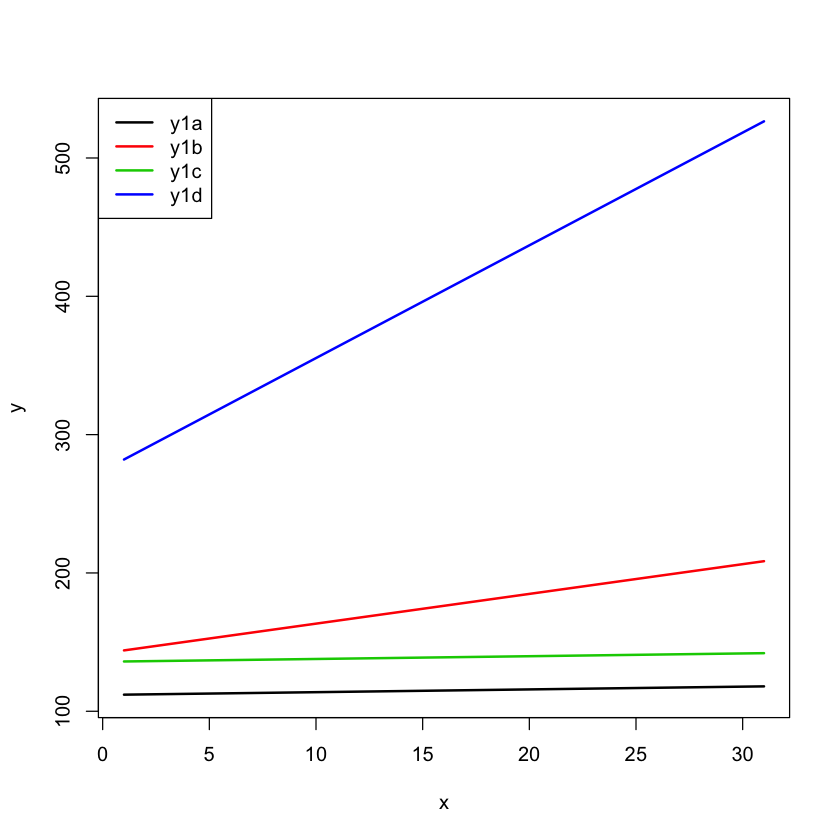

In [160]:
x = seq(20, 50, 1)
y1a = 108 + 0.2 * x
y1b = 101 + 2.15* x
y1c = 132 + 0.2 * x
y1d = 119 + 8.15* x
table = data.frame(y1a,y1b,y1c,y1d)
matplot(table, type = c("l"), col = 1:4, lty = 1, lwd = 2, xlab = "x", ylab = "y")
legend("topleft", legend = c("y1a", "y1b", "y1c", "y1d"), col = 1:4, lty = 1, lwd = 2)

__b.__ Find the expected change in the mean conversion for a unit change in
temperature x1 for model 1 when x2 = 5. Does this quantity depend on the
specific value of reaction time selected? Why?

It is the slope which is .2 regardless of the value of x2